In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [5]:
X

array([[ 2.65287341,  3.09635309],
       [ 3.41671553, -0.44855354],
       [ 0.29218706, -0.63133266],
       ...,
       [-1.25663497, -0.37515294],
       [ 2.40794398,  0.89244715],
       [ 0.908682  ,  0.69827565]])

In [6]:
y

array([ 3.38365162e+02,  1.18647022e+02, -2.64394054e+01,  9.01536350e+01,
       -8.07817328e+01,  1.03882269e+02,  6.30278091e+01, -8.97737738e+01,
       -3.05560340e+01, -2.47573982e+01,  1.88406366e+02,  1.48392277e+01,
        3.65851972e+01, -1.35411954e+01,  1.53666785e+01,  5.63240301e+01,
        6.21500922e-01,  1.14365212e+02, -5.69192602e+01, -5.06418996e+01,
       -9.14792085e+01,  3.11621145e+01,  1.50650958e+02,  1.19654818e+01,
        6.10815463e+00,  9.25776114e+00,  1.01066373e+01,  7.35364996e+01,
       -3.29819304e+01,  4.62400952e+01, -3.73432586e+00,  7.81650888e+01,
        1.06053667e+02,  1.10696503e+02, -6.05319661e+01, -1.13407934e+02,
       -2.53911354e+01,  2.10922667e+02, -4.81882852e+01, -1.89980402e+02,
       -8.28158698e+01,  1.63357692e+02, -2.40047106e+00,  4.69902789e+01,
       -3.86564768e+01, -7.35583029e+01, -1.00879023e+02, -5.87062033e+01,
       -1.05805188e+02,  6.80588531e+01, -1.88237234e+01,  1.38529883e+02,
        1.22589380e+02, -

In [7]:
pd.DataFrame(X)[0]

0      2.652873
1      3.416716
2      0.292187
3      1.012471
4     -1.094872
         ...   
995    1.616475
996   -0.631027
997   -1.256635
998    2.407944
999    0.908682
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

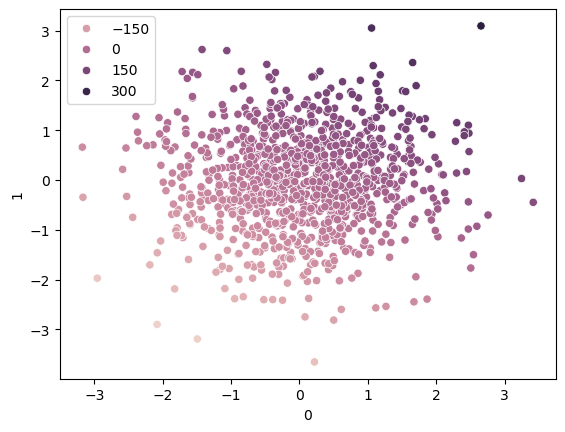

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=10)

In [10]:
from sklearn.svm import SVR

In [13]:
svr = SVR(kernel='linear')

In [14]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[45.88355052, 70.32394916]])

In [16]:
y_pred = svr.predict(X_test)

In [17]:
y_pred

array([ 2.08184177e+01,  2.71832741e+01,  1.13713874e+02, -1.70088770e+02,
       -7.50552181e+01, -4.10352309e+01, -5.53768900e+01,  8.47427807e+00,
        1.99935029e+01, -1.92414473e+01, -6.86741771e+01,  1.19068597e+02,
       -6.84074808e+01,  1.25127785e+02,  6.14199222e+01,  4.73218549e+01,
       -8.97958591e+01,  2.19199341e+01, -9.92482915e+00, -5.69512212e+01,
        5.53704091e+01,  3.39519751e+01, -1.39161305e+01,  4.39594389e+01,
        2.46976443e+01, -1.11255823e+00,  4.24900300e+01, -5.39078301e+00,
        9.30819221e+01, -5.65921587e+01,  7.95096398e+00, -2.09903700e+01,
       -1.38049538e+02,  3.59961318e+01,  4.90337722e+01,  4.19446976e+01,
       -2.36142728e+01,  1.16415458e+02,  1.25638391e+02, -1.73522067e+02,
       -1.85752875e+01,  1.17245191e+00,  8.30635942e+01, -3.06256030e+01,
        2.11022467e+02,  4.24862896e+01, -4.04282781e+01, -1.22961300e+01,
       -1.32530395e+02,  5.18474738e+01,  6.56190859e+01,  5.74206478e+01,
        1.11724343e+02,  

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test, y_pred))

0.9985784107384936


### Hyperparameter Tuning With SVR

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
# defining params range
param_grid = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [23]:
grid = GridSearchCV(SVR(), param_grid=param_grid , scoring='neg_mean_squared_error', refit=True, cv=5, verbose=3)

In [24]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.793 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.801 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.793 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.801 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon

[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 tot

[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=

[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.6s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [26]:
## Prediction 
y_pred4 = grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9986301639849992
